In [1]:
from pathlib import Path

In [2]:
base_path = Path(
    "/kreka/research/willy/side/brain_datasets/openneuro_thingseeg_ds003825"
)

In [3]:
sub_01 = base_path / "sub-01" / "eeg"

In [4]:
sub_01_eeg = sub_01 / "sub-01_task-rsvp_eeg.eeg"
sub_01_vhdr = sub_01 / "sub-01_task-rsvp_eeg.vhdr"
json_file = sub_01 / "sub-01_task-rsvp_eeg.json"

In [5]:
import mne
raw_data = mne.io.read_raw_brainvision(
    sub_01_vhdr
)

Extracting parameters from /kreka/research/willy/side/brain_datasets/openneuro_thingseeg_ds003825/sub-01/eeg/sub-01_task-rsvp_eeg.vhdr...
Setting channel info structure...


In [6]:
raw_data

<RawBrainVision | sub-01_task-rsvp_eeg.eeg, 63 x 3035740 (3035.7 s), ~78 KiB, data not loaded>

In [7]:
raw_data.annotations

<Annotations | 44568 segments: Event/E 1 (22248), Event/E 2 (22248), ...>

In [8]:
raw_data.annotations[0]

OrderedDict([('onset', np.float64(9.724)),
             ('duration', np.float64(0.001)),
             ('description', np.str_('Event/E  3')),
             ('orig_time',
              datetime.datetime(2019, 2, 22, 14, 39, 19, 987016, tzinfo=datetime.timezone.utc)),
             ('extras', {})])

In [9]:
raw_data.annotations[100]

OrderedDict([('onset', np.float64(15.673)),
             ('duration', np.float64(0.001)),
             ('description', np.str_('Event/E  2')),
             ('orig_time',
              datetime.datetime(2019, 2, 22, 14, 39, 19, 987016, tzinfo=datetime.timezone.utc)),
             ('extras', {})])

In [10]:
import json
j = json.loads(json_file.read_text())

In [11]:
type(j)

dict

In [12]:
j.keys()

dict_keys(['TaskName', 'PowerLineFrequency', 'SamplingFrequency', 'EEGChannelCount', 'EOGChannelCount', 'ECGChannelCount', 'EMGChannelCount', 'EEGReference', 'SoftwareFilters'])

In [13]:
j

{'TaskName': 'rsvp',
 'PowerLineFrequency': 50,
 'SamplingFrequency': 1000,
 'EEGChannelCount': 63,
 'EOGChannelCount': 0,
 'ECGChannelCount': 0,
 'EMGChannelCount': 0,
 'EEGReference': 'Cz',
 'SoftwareFilters': 'n/a'}

In [14]:
csv_file = sub_01 / "sub-01_task-rsvp_events.csv"

In [15]:
import polars as pl
df = pl.read_csv(csv_file)


In [16]:
df

eventnumber,objectnumber,object,sequencenumber,presentationnumber,blocksequencenumber,withinsequencenumber,stimnumber,stim,istarget,stimname,response,rt,correct,time_stimon,time_stimoff,stimdur
i64,i64,str,i64,i64,i64,i64,i64,str,i64,str,f64,f64,f64,f64,f64,f64
0,275,"""carousel""",0,0,0,0,10,"""stimuli\carousel\carousel_11s.…",0,"""carousel_11s.jpg""",0.0,0.0,0.0,61.55256,61.60254,0.04998
1,1165,"""piano""",0,1,0,0,4,"""stimuli\piano\piano_05n.jpg""",0,"""piano_05n.jpg""",0.0,0.0,0.0,61.65256,61.702538,0.049977
2,1735,"""turntable""",0,2,0,0,11,"""stimuli\turntable\turntable_12…",0,"""turntable_12s.jpg""",0.0,0.0,0.0,61.752561,61.802545,0.049984
3,1643,"""tent""",0,3,0,0,7,"""stimuli\tent\tent_08n.jpg""",0,"""tent_08n.jpg""",0.0,0.0,0.0,61.852564,61.902516,0.049951
4,1564,"""stove2""",0,4,0,0,8,"""stimuli\stove2\stove2_09s.jpg""",0,"""stove2_09s.jpg""",0.0,0.0,0.0,61.952542,62.002516,0.049974
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
22243,561,"""exerciser""",71,304,11,5,7,"""stimuli\exerciser\exerciser_08…",0,"""exerciser_08s.jpg""",0.0,0.0,0.0,3073.566026,3073.616007,0.049981
22244,975,"""marker""",71,305,11,5,2,"""stimuli\marker\marker_03s.jpg""",0,"""marker_03s.jpg""",0.0,0.0,0.0,3073.66603,3073.716011,0.049981
22245,945,"""lollipop""",71,306,11,5,3,"""stimuli\lollipop\lollipop_04s.…",0,"""lollipop_04s.jpg""",0.0,0.0,0.0,3073.766028,3073.816012,0.049984


In [17]:
dir(raw_data)

['__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotations',
 '_cals',
 '_check_bad_segment',
 '_comp',
 '_cropped_samp',
 '_dtype',
 '_dtype_',
 '_extra_attributes',
 '_filenames',
 '_first_samps',
 '_first_time',
 '_get_buffer_size',
 '_get_channel_positions',
 '_get_duration_string',
 '_getitem',
 '_handle_tmin_tmax',
 '_init_kwargs',
 '_last_samps',
 '_last_time',
 '_orig_units',
 '_parse_get_set_params',
 '_pick_drop_channels',
 '_pick_projs',
 '_preload_data',
 '_projector',
 '_raw_extras',
 '_raw_le

In [18]:
events, event_id = mne.events_from_annotations(
    raw_data,
    regexp=".*1.*"
)

Used Annotations descriptions: [np.str_('Event/E  1')]


In [19]:
event_id

{np.str_('Event/E  1'): 10001}

In [20]:
events.shape

(22248, 3)

In [21]:
events

array([[  10723,       0,   10001],
       [  10823,       0,   10001],
       [  10923,       0,   10001],
       ...,
       [3022926,       0,   10001],
       [3023026,       0,   10001],
       [3023126,       0,   10001]], shape=(22248, 3))

In [22]:
epochs = mne.Epochs(
    raw_data,
    events,
    event_id=event_id,
    tmin=-0.05,
    tmax=0.2,
)

Not setting metadata
22248 matching events found
Setting baseline interval to [-0.05, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated


In [23]:
epochs[0]

<Epochs | 1 events (good & bad), -0.05 – 0.2 s (baseline -0.05 – 0 s), ~78 KiB, data not loaded,
 np.str_('Event/E  1'): 1>

In [24]:
epochs[0].ch_names

['Fp1',
 'Fz',
 'F3',
 'F7',
 'FT9',
 'FC5',
 'FC1',
 'C3',
 'T7',
 'TP9',
 'CP5',
 'CP1',
 'Pz',
 'P3',
 'P7',
 'O1',
 'Oz',
 'O2',
 'P4',
 'P8',
 'TP10',
 'CP6',
 'CP2',
 'C4',
 'T8',
 'FT10',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'Fp2',
 'AF7',
 'AF3',
 'AFz',
 'F1',
 'F5',
 'FT7',
 'FC3',
 'C1',
 'C5',
 'TP7',
 'CP3',
 'P1',
 'P5',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8',
 'P6',
 'P2',
 'CPz',
 'CP4',
 'TP8',
 'C6',
 'C2',
 'FC4',
 'FT8',
 'F6',
 'AF8',
 'AF4',
 'F2',
 'FCz']

In [25]:
epochs[0].get_data().shape

Loading data for 1 events and 251 original time points ...
0 bad epochs dropped


(1, 63, 251)

In [26]:
print(epochs[0].ch_names)

['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'AF7', 'AF3', 'AFz', 'F1', 'F5', 'FT7', 'FC3', 'C1', 'C5', 'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'CPz', 'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'AF8', 'AF4', 'F2', 'FCz']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualize(data, lines=None, ch_names=None, figsize=(14, 20), line_color='red'):
    """
    Visualize arbitrary EEG data as separate graphs for each channel.
    
    Args:
        data: Array of shape (Channels, Samples)
        lines: Optional list of x positions to draw vertical lines, e.g. [100, 200]
        ch_names: Optional list of channel names. If None, uses "Channel N".
        figsize: Figure size as (width, height) tuple.
        line_color: Color for vertical lines (default 'red').
    """
    n_channels, n_samples = data.shape
    x_vals = np.arange(n_samples)
    
    if ch_names is None:
        ch_names = [f"Channel {i}" for i in range(n_channels)]
    
    fig, axes = plt.subplots(n_channels, 1, figsize=figsize, sharex=True)
    
    # Handle single channel case
    if n_channels == 1:
        axes = [axes]
    
    for i, (ax, name) in enumerate(zip(axes, ch_names)):
        ax.plot(x_vals, data[i], linewidth=0.8)
        ax.set_ylabel(name, fontsize=8, rotation=0, labelpad=40, ha='right')
        ax.tick_params(axis='y', labelsize=6)
        if i < n_channels - 1:
            ax.tick_params(axis='x', labelbottom=False)
    
    # Add vertical lines at specified positions
    if lines is not None:
        for line_pos in lines:
            for ax in axes:
                ax.axvline(x=line_pos, color=line_color, linestyle='--', linewidth=0.5, alpha=0.7)
    
    axes[-1].set_xlabel("Sample")
    plt.tight_layout()
    plt.show()

# Example usage:
# visualize(t["preprocessed_eeg_data"][0], lines=[100, 200], ch_names=t["ch_names"])

Loading data for 1 events and 251 original time points ...
0 bad epochs dropped


/tmp/ipykernel_118520/142278728.py:41: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


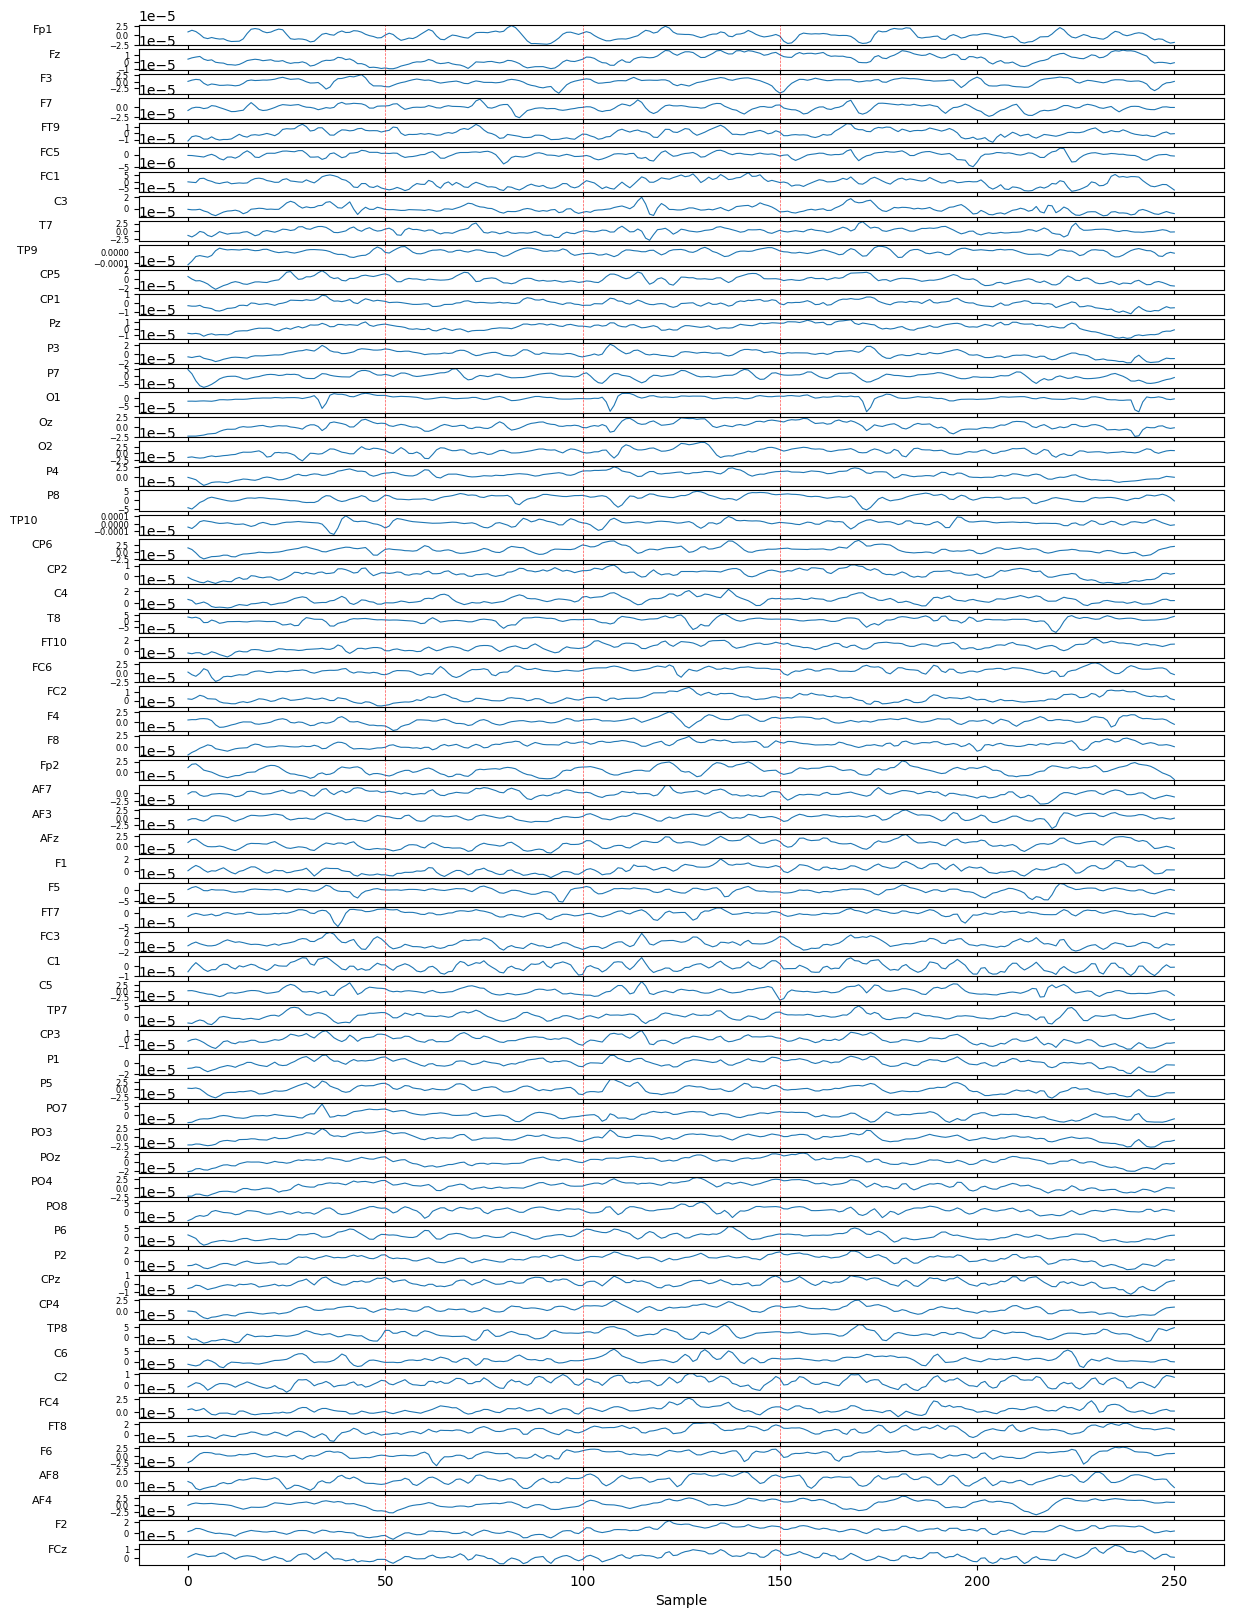

In [ ]:
visualize(epochs[150].get_data().squeeze(), ch_names=epochs[0].ch_names, lines=[50, 100, 150])

In [ ]:
epochs[0]

<Epochs | 1 events (good & bad), -0.05 – 0.2 s (baseline -0.05 – 0 s), ~78 KiB, data not loaded,
 np.str_('Event/E  1'): 1>

In [ ]:
dir(epochs[0])

['__class__',
 '__contains__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_allow_empty',
 '_annotations',
 '_bad_dropped',
 '_channel_type_idx',
 '_check_consistency',
 '_check_metadata',
 '_compute_aggregate',
 '_current',
 '_data',
 '_data_sel_copy_scale',
 '_decim',
 '_decim_slice',
 '_detrend_offset_decim',
 '_detrend_picks',
 '_do_baseline',
 '_do_delayed_proj',
 '_evoked_from_epoch_data',
 '_filename',
 '_get_channel_positions',
 '_get_data',
 '_get_epoch_from_raw',
 '_get_name',
 '_getitem',
 '_handle_empty',
 '_handle_tmin_tmax',
 '_is_g

In [ ]:
epochs[0].times

array([-0.05 , -0.049, -0.048, -0.047, -0.046, -0.045, -0.044, -0.043,
       -0.042, -0.041, -0.04 , -0.039, -0.038, -0.037, -0.036, -0.035,
       -0.034, -0.033, -0.032, -0.031, -0.03 , -0.029, -0.028, -0.027,
       -0.026, -0.025, -0.024, -0.023, -0.022, -0.021, -0.02 , -0.019,
       -0.018, -0.017, -0.016, -0.015, -0.014, -0.013, -0.012, -0.011,
       -0.01 , -0.009, -0.008, -0.007, -0.006, -0.005, -0.004, -0.003,
       -0.002, -0.001,  0.   ,  0.001,  0.002,  0.003,  0.004,  0.005,
        0.006,  0.007,  0.008,  0.009,  0.01 ,  0.011,  0.012,  0.013,
        0.014,  0.015,  0.016,  0.017,  0.018,  0.019,  0.02 ,  0.021,
        0.022,  0.023,  0.024,  0.025,  0.026,  0.027,  0.028,  0.029,
        0.03 ,  0.031,  0.032,  0.033,  0.034,  0.035,  0.036,  0.037,
        0.038,  0.039,  0.04 ,  0.041,  0.042,  0.043,  0.044,  0.045,
        0.046,  0.047,  0.048,  0.049,  0.05 ,  0.051,  0.052,  0.053,
        0.054,  0.055,  0.056,  0.057,  0.058,  0.059,  0.06 ,  0.061,
      

In [ ]:
epochs[1].times

array([-0.05 , -0.049, -0.048, -0.047, -0.046, -0.045, -0.044, -0.043,
       -0.042, -0.041, -0.04 , -0.039, -0.038, -0.037, -0.036, -0.035,
       -0.034, -0.033, -0.032, -0.031, -0.03 , -0.029, -0.028, -0.027,
       -0.026, -0.025, -0.024, -0.023, -0.022, -0.021, -0.02 , -0.019,
       -0.018, -0.017, -0.016, -0.015, -0.014, -0.013, -0.012, -0.011,
       -0.01 , -0.009, -0.008, -0.007, -0.006, -0.005, -0.004, -0.003,
       -0.002, -0.001,  0.   ,  0.001,  0.002,  0.003,  0.004,  0.005,
        0.006,  0.007,  0.008,  0.009,  0.01 ,  0.011,  0.012,  0.013,
        0.014,  0.015,  0.016,  0.017,  0.018,  0.019,  0.02 ,  0.021,
        0.022,  0.023,  0.024,  0.025,  0.026,  0.027,  0.028,  0.029,
        0.03 ,  0.031,  0.032,  0.033,  0.034,  0.035,  0.036,  0.037,
        0.038,  0.039,  0.04 ,  0.041,  0.042,  0.043,  0.044,  0.045,
        0.046,  0.047,  0.048,  0.049,  0.05 ,  0.051,  0.052,  0.053,
        0.054,  0.055,  0.056,  0.057,  0.058,  0.059,  0.06 ,  0.061,
      